# Generate and Store Dataset

In [1]:
from BasicDataProcessing.generate_train_labels import list_audios
from BasicDataProcessing.generate_spectrograms import *
import numpy as np

In [2]:
audio_list = list_audios("../voxceleb1/vox1_dev_partaa/")
audio_list_test = list_audios("../voxceleb1/test/")

## Spectrograms specs

In [3]:
#Set the spectrograms specifications here and choose the type (log-mel or log-mel-normalized) 
#by running or  not the next sections
audio_ms = 3000 #Length of the audios in milliseconds
sampling_rate = 16000
n_mels = 64
window_ms = 20
stride_ms = 10
normalize = True
base_str = "melSpecSr"+str(audio_ms)+"ms"+str(sampling_rate)+"Hz"+str(n_mels)+"mels"+str(window_ms)+"wd"+str(stride_ms)+"st.bin"
if normalize:
    train_file_pickle = "spectrograms/Norm" + base_str
    test_file_pickle = "spectrograms/NormTest" + base_str 
    scaler_file_pickle = "spectrograms/Scaler" + base_str
else:
    train_file_pickle = "spectrograms/" + base_str
    test_file_pickle = "spectrograms/Test" + base_str 

### Creating new not Normalized spectrograms 

In [4]:
if normalize:
    print("Something is not right! You chose to normalize but this is the not normalized section")
import time
start_time = time.time()

%cd ../voxceleb1/vox1_dev_partaa/
spectrograms = mel_spectrograms(audio_list, audio_ms, sampling_rate, n_mels, window_ms, stride_ms)

%cd ../test/
spectrograms_test = mel_spectrograms(audio_list_test, audio_ms, sampling_rate, n_mels, window_ms, stride_ms)

print("--- %s seconds ---" % (time.time() - start_time))
print(len(spectrograms))
print(len(spectrograms_test))
stride_size = int(0.001 * 16000 * 10)
display_spectrogram(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"], 16000, stride_size)
%cd ../../SpeakerVerificationML/

/Users/zeba/Desktop/speakerVerification/voxceleb1/vox1_dev_partaa


### Creating new Normalized spectrograms

/Users/zeba/Desktop/speakerVerification/voxceleb1/vox1_dev_partaa
/Users/zeba/Desktop/speakerVerification/voxceleb1/test
--- 503.2079508304596 seconds ---
48840
4874
(64, 301)
<class 'numpy.float32'>
/Users/zeba/Desktop/speakerVerification/SpeakerVerificationML


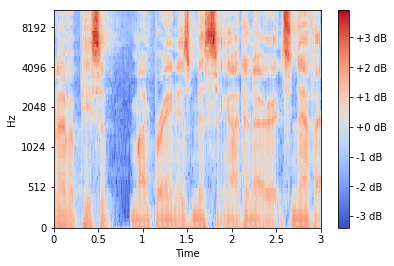

In [4]:
if not normalize:
    print("Something is not right! You chose to not normalize but this is the normalized section")
import time
start_time = time.time()

%cd ../voxceleb1/vox1_dev_partaa/
spectrograms, train_scaler = mel_spectrogramsNormalized(audio_list, audio_ms, sampling_rate, n_mels, window_ms, stride_ms)

%cd ../test/
spectrograms_test = mel_spectrograms(audio_list_test, audio_ms, sampling_rate, n_mels, window_ms, stride_ms)
spectrograms_test = NormalizeDictUsingScaler(spectrograms_test, audio_list_test, train_scaler)

print("--- %s seconds ---" % (time.time() - start_time))
print(len(spectrograms))
print(len(spectrograms_test))
stride_size = int(0.001 * 16000 * 10)
display_spectrogram(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"], 16000, stride_size)
print(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"].shape)
print(type(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"][0][0]))
%cd ../../SpeakerVerificationML/

## Dumps spectrograms using pickle

In [5]:
#If hasn't saved the spectrograms in a file
import pickle
start_time = time.time()
    
with open(train_file_pickle, "wb") as myFile:
    pickle.dump(spectrograms, myFile)
    
with open(test_file_pickle, "wb") as myFile:
    pickle.dump(spectrograms_test, myFile)

if normalize:
    with open(scaler_file_pickle, "wb") as myFile:
        pickle.dump(train_scaler, myFile)
        
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.760748624801636 seconds ---


## Loading spectrograms

How to load the spectrograms using Pickle (the path might change)

In [4]:
#If only wants to load:
import pickle

with open(train_file_pickle, "rb") as myFile:
    spectrograms = pickle.load(myFile)
    
with open(test_file_pickle, "rb") as myFile:
    spectrograms_test = pickle.load(myFile)

if normalize:
    with open(scaler_file_pickle, "rb") as myFile:
        train_scaler = pickle.load(myFile)

numpy.float64

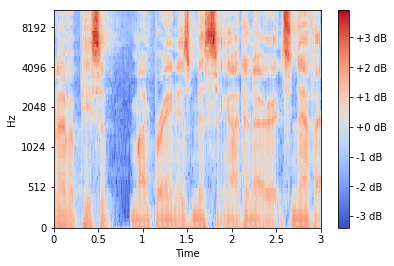

In [7]:
stride_size = int(0.001 * 16000 * 10)
display_spectrogram(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"], 16000, stride_size)
print(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"].shape)
type(spectrograms["id10022/ZXYlWu1JfKU/00024.wav"][0][0])

## Get the dataset labels

In [6]:
train_list_audios_x = []
train_list_y = []
with open("../voxceleb1/veri_train.txt") as train_labels_file:
    for line in train_labels_file:
        splitted = line.split()
        train_list_y.append(splitted[0])
        train_list_audios_x.append([splitted[1],splitted[2]])

train_y = np.zeros((len(train_list_y), 1))

for i in range(len(train_list_y)):
    train_y[i] = train_list_y[i]
    
print(train_y.shape)
print(len(train_list_audios_x))

#Generate test datasets
test_list_audios_x = []
test_list_y = []
with open("../voxceleb1/veri_test.txt") as test_labels_file:
    for line in test_labels_file:
        splitted = line.split()
        test_list_y.append(splitted[0])
        test_list_audios_x.append([splitted[1],splitted[2]])

test_y = np.zeros((len(test_list_y), 1))

for i in range(len(test_list_y)):
    test_y[i] = test_list_y[i]

print(test_y.shape)
print(len(test_list_audios_x))

(311260, 1)
311260
(37720, 1)
37720


In [7]:
train_list_audios_x[311259]

['id11096/5n94z8rkb0U/00005.wav', 'id11096/Zvkwxk-EBVY/00003.wav']

In [8]:
#Generates mini batches concatenating the spectrograms in one channel
def generate_mini_batch_concat(size, index, spectrograms, spec_shape, train_y, train_list_audios_x):
    min_index = index*size
    max_index = len(train_list_audios_x) if (len(train_list_audios_x) <= (index+1)*size) else (index+1)*size
    
    mini_batch_x = np.zeros((max_index - min_index, spec_shape[0], spec_shape[1]*2, 1)) #NHWC
    mini_batch_y = train_y[min_index : max_index]
    for i in range(min_index, max_index):
        mini_batch_x[i - min_index,:,:,0] = np.concatenate((spectrograms[train_list_audios_x[i][0]], spectrograms[train_list_audios_x[i][1]]), axis=1)
        
    return np.float32(mini_batch_x), mini_batch_y
    

In [9]:
generate_mini_batch_concat(1, 0, spectrograms, (64, 301), train_y, train_list_audios_x)[0].shape

(1, 64, 602, 1)

Sanity check

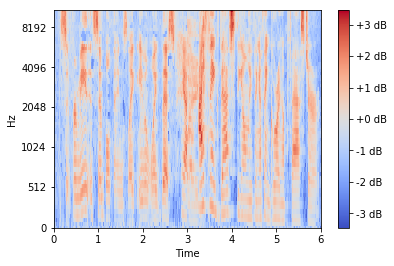

In [10]:
stride_size = int(0.001 * 16000 * 10)
display_spectrogram(np.concatenate((spectrograms[train_list_audios_x[0][0]], spectrograms[train_list_audios_x[0][1]]), axis=1), 16000, stride_size)

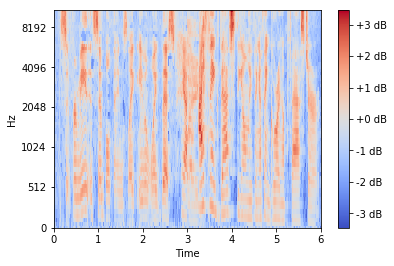

In [11]:
mini_batch_x, mini_batch_y = generate_mini_batch_concat(1, 0, spectrograms, (64, 301), train_y, train_list_audios_x)
display_spectrogram(mini_batch_x[0,:,:,0], 16000, stride_size)

# Model Protoypes

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from math import ceil

from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

backend.set_floatx('float32')
backend.set_image_data_format('channels_last')

In [73]:
# Get the model.
input_shape = (64, 301*2, 1)
'''
inputs = Input(shape=input_shape, name='spectrograms')

x = Flatten()(inputs)
x = Dense(128, activation='relu', name='dense_1')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', name='dense_2')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', name='dense_3')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', name='dense_4')(x)
outputs = Dense(2, name='predictions')(x)
model = Model(inputs=inputs, outputs=outputs)
'''
# Set up the sequential model
model = Sequential()

# Second layer: Convolutional layer with max pooling and batch normalization.
model.add(Conv2D(input_shape = input_shape,
                 kernel_size=(11, 11),
                              strides=(2, 2),
                              padding="valid",
                              filters=48,
                              activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2),
                                    strides=(2, 3),
                                    padding="valid"))
model.add(BatchNormalization())
# Third layer: Convolutional layer with batch normalization.
model.add(Conv2D(kernel_size=(3, 3),
                              strides=(2, 2),
                              padding="valid",
                              filters=64,
                              activation=tf.nn.relu))
model.add(BatchNormalization())
# Fifth layer: Convolutional layer with max pooling and batch normalization.
model.add(Conv2D(kernel_size=(3, 3),
                              strides=(1, 1),
                              padding="valid",
                              filters=48,
                              activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2),
                                    strides=(2, 2),
                                    padding="valid"))
model.add(BatchNormalization())
# Flatten the output to feed it to dense layers
model.add(Flatten())
# Sixth layer: fully connected layer with 4096 neurons with 40% dropout and batch normalization.
model.add(Dense(units=4096,
                             activation=tf.nn.relu))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())

# Seventh layer: fully connected layer with 4096 neurons with 40% dropout and batch normalization.
model.add(Dense(units=4096,
                             activation=tf.nn.relu))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())

# Eigth layer: fully connected layer with 1000 neurons with 40% dropout and batch normalization.
model.add(Dense(units=1000,
                             activation=tf.nn.relu))
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())

# Output layer: softmax function of 102 classes of the dataset. This integer should be changed to match
# the number of classes in your dataset if you change from Oxford_Flowers.
model.add(Dense(units=2,
                             activation=tf.nn.softmax))
# Instantiate an optimizer.
optimizer = Adam(learning_rate=1e-4)
# Instantiate a loss function.
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

In [74]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 27, 296, 48)       5856      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 99, 48)        0         
_________________________________________________________________
batch_normalization_145 (Bat (None, 13, 99, 48)        192       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 6, 49, 64)         27712     
_________________________________________________________________
batch_normalization_146 (Bat (None, 6, 49, 64)         256       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 4, 47, 48)         27696     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 2, 23, 48)       

In [75]:
epochs = 2
mini_batch_size = 128
spec_shape = (64, 301)
generate_mini_batch = generate_mini_batch_concat

start_time = time.time()

for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))
    last_index = ceil(len(train_list_audios_x) / mini_batch_size)

    # Iterate over the batches of the dataset.
    for step in range(last_index):
        mini_batch_x, mini_batch_y = generate_mini_batch(mini_batch_size, step, spectrograms, spec_shape, train_y, train_list_audios_x)

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(mini_batch_x, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(mini_batch_y, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
            print('Seen so far: %s samples' % ((step + 1) * mini_batch_size))
print("--- %s seconds ---" % (time.time() - start_time))

Start of epoch 0
Training loss (for one batch) at step 0: 0.72831130027771
Seen so far: 128 samples
Training loss (for one batch) at step 200: 0.7904291152954102
Seen so far: 25728 samples
Training loss (for one batch) at step 400: 0.7091279029846191
Seen so far: 51328 samples
Training loss (for one batch) at step 600: 0.7594971656799316
Seen so far: 76928 samples
Training loss (for one batch) at step 800: 0.6963620185852051
Seen so far: 102528 samples


KeyboardInterrupt: 

In [48]:
#Evaluates on a dataset using SparseCategoricalAccuracy
def evaluate_mini_batches_SparCateAccuracy(model, mini_batch_size, spec_shape, test_y, test_list_audios_x, spectrograms):
    test_acc_metric = SparseCategoricalAccuracy()

    last_index = ceil(len(test_list_audios_x) / mini_batch_size)

    # Iterate over the batches of the dataset.
    for step in range(last_index):
        mini_batch_x, mini_batch_y = generate_mini_batch(mini_batch_size, step, spectrograms, spec_shape, test_y, test_list_audios_x)
        test_logits = model(mini_batch_x)
        # Update val metrics
        test_acc_metric(mini_batch_y, test_logits)
    test_acc = test_acc_metric.result()
    test_acc_metric.reset_states()
    return float(test_acc)

In [50]:
#Test set
mini_batch_size = 32
evaluate_mini_batches_SparCateAccuracy(model, mini_batch_size, spec_shape, test_y, test_list_audios_x, spectrograms_test)

0.5

In [138]:
#Train set
mini_batch_size = 32
evaluate_mini_batches_SparCateAccuracy(model, mini_batch_size, spec_shape, train_y, train_list_audios_x, spectrograms)

0.9250530004501343

In [ ]:
#Test running times for models
import time
epochs = 3
mini_batch_size = 128
spec_shape = (64, 301)
generate_mini_batch = generate_mini_batch_concat

start_time = time.time()

for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))
    last_index = ceil(len(train_list_audios_x) / mini_batch_size)

    # Iterate over the batches of the dataset.
    #for step in range(last_index):
    for step in range(2):
        mini_batch_gen = time.time()
        mini_batch_x, mini_batch_y = generate_mini_batch(mini_batch_size, step, spectrograms, spec_shape, train_y, train_list_audios_x)
        print("Mini batch gen =  %s seconds ---" % (time.time() - mini_batch_gen))
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            model_pass = time.time()
            logits = model(mini_batch_x, training=True)  # Logits for this minibatch
            print("Model pass =  %s seconds ---" % (time.time() - model_pass))

            # Compute the loss value for this minibatch.
            loss_pass = time.time()
            loss_value = loss_fn(mini_batch_y, logits)
            print("Loss pass =  %s seconds ---" % (time.time() - loss_pass))

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads_pass = time.time()
        grads = tape.gradient(loss_value, model.trainable_weights)
        print("Grads pass =  %s seconds ---" % (time.time() - grads_pass))

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        opt_pass = time.time()
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        print("Opt pass =  %s seconds ---" % (time.time() - opt_pass))

        # Log every 200 batches.
        if step % 200 == 0:
            print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
            print('Seen so far: %s samples' % ((step + 1) * mini_batch_size))
print("--- %s seconds ---" % (time.time() - start_time))